### Setting the working directory

In [1]:
import os
os.chdir('E:\\DBDAproject\\UrbanSound8K')
os.getcwd()

'E:\\DBDAproject\\UrbanSound8K'

### Loading the audio file with Librosa and Scipy 
Librosa: Librosa is a Python package for music and audio analysis, it is basically used when we work with audio data. It provides the building blocks necessary to create the music information retrieval systems.we have used Librosa to load audio data and plot the waveform. When we load any audio file with Librosa, it gives us 2 things. One is sample rate, and the other is a two-dimensional array. It normalizes the entire data and tries to give it in a single sample rate.
Scipy: Scipy can be used to read and write a wav file. When you print the sample rate using scipy it is different than librosa. When we print the data retrieved from librosa, it can be normalized, but when we try to read an audio file using scipy, it can’t be normalized.

In [2]:
import librosa
audio_file_path='7389-1-0-3.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [3]:
print(librosa_audio_data)

[-0.02386769 -0.03687567 -0.00485888 ...  0.05136788  0.07870291
  0.11293375]


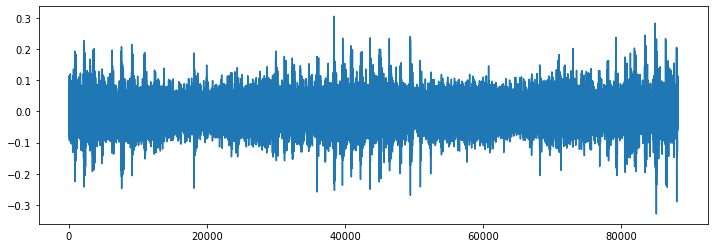

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

In [5]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path)

In [6]:
wave_audio

array([[-1898,  -144],
       [-2528,   204],
       [-2216,   -13],
       ...,
       [  644,  5712],
       [  228,  5496],
       [ 1689,  6948]], dtype=int16)

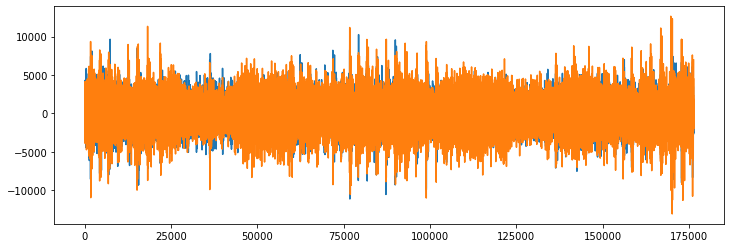

In [7]:
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

### Extracting features of the audio file using MFCC
Mel-Frequency Cepstral Coefficients (MFCC) is used for feature extraction from the audio samples.MFCC algorithm summarizes the frequency distribution across the window size. This enables the analysis of both the frequency and time characteristics of the provided sound. It will allow us to identify features for classification.

In [8]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


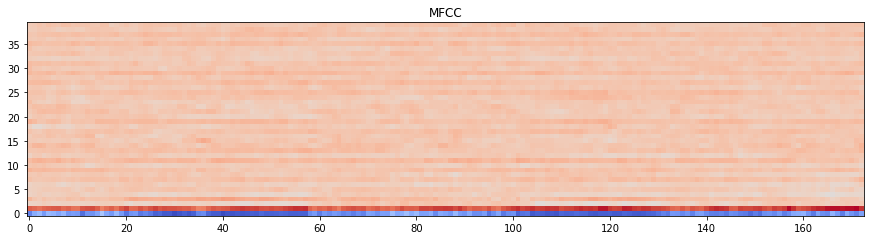

In [9]:
from matplotlib import cm
fig, ax = plt.subplots(figsize=(15, 20))
cax = ax.imshow(mfccs, interpolation='nearest', cmap=cm.coolwarm, origin='lower')
ax.set_title('MFCC')

plt.show()

In [10]:
mfccs

array([[-112.31971   ,  -86.90853   ,  -77.317406  , ..., -102.34483   ,
        -112.47733   ,  -94.71932   ],
       [  57.23858   ,   53.75426   ,   49.33352   , ...,   83.83688   ,
          86.33954   ,   75.405655  ],
       [ -14.45102   ,  -13.030968  ,  -11.468655  , ...,   -5.2878532 ,
          -6.4866962 ,   -3.8923998 ],
       ...,
       [  -1.7540191 ,   -2.584349  ,    0.976379  , ...,    0.64533144,
           5.3421474 ,    9.130876  ],
       [  -6.983704  ,   -5.9809284 ,   -2.2663467 , ...,   -2.6751926 ,
          -3.6924214 ,   -4.439323  ],
       [  -5.946202  ,   -4.021203  ,    0.24726689, ...,    0.23903346,
           1.4990036 ,    1.4391338 ]], dtype=float32)

### Reading the csv file metadata.csv 
meatdata.csv : This file contains meta-data information about every audio file in the dataset.

In [11]:
import pandas as pd
import os
import librosa

audio_dataset_path='audio/'
metadata=pd.read_csv('metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


### Generalizing the MFCC code for entire dataset 

In [12]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [13]:
import numpy as np
from tqdm import tqdm
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3555it [07:53,  7.06it/s]D:\anaconda\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1323
  warnings.warn(
8325it [17:35, 10.65it/s]D:\anaconda\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1103
  warnings.warn(
8329it [17:35, 16.02it/s]D:\anaconda\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1523
  warnings.warn(
8732it [18:26,  7.89it/s]


In [14]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-215.79301, 71.66612, -131.81377, -52.091328,...",dog_bark
1,"[-424.68677, 110.56227, -54.148235, 62.01073, ...",children_playing
2,"[-459.56467, 122.800354, -47.92471, 53.265694,...",children_playing
3,"[-414.55377, 102.896904, -36.66495, 54.18041, ...",children_playing
4,"[-447.397, 115.0954, -53.809113, 61.608585, 1....",children_playing


In [15]:
extracted_features_df.to_csv('extracted_features.csv',index=False)

### Train test split

In [16]:
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [17]:
X.shape

(8732, 40)

In [18]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [19]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [20]:
y[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [21]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [22]:
X_train

array([[-1.3183614e+02,  1.1397464e+02, -2.3956861e+01, ...,
         3.3314774e+00, -1.4786110e+00,  2.8736601e+00],
       [-1.4074220e+01,  9.1916939e+01, -8.6787214e+00, ...,
        -3.3844023e+00, -5.2119045e+00, -1.5936139e+00],
       [-4.9532028e+01,  1.5521857e-01, -2.0369110e+01, ...,
         2.0491767e+00, -8.0537474e-01,  2.7793028e+00],
       ...,
       [-4.2699332e+02,  9.2890656e+01,  3.0233388e+00, ...,
         8.6335957e-01,  6.4766806e-01,  7.8490508e-01],
       [-1.4607024e+02,  1.3709459e+02, -3.4298344e+01, ...,
         1.3777871e+00, -1.9530845e+00, -8.9652127e-01],
       [-4.2167450e+02,  2.1169032e+02,  2.6820304e+00, ...,
        -5.1484952e+00, -3.6400862e+00, -1.3321609e+00]], dtype=float32)

In [23]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [24]:
X_train.shape,X_test.shape

((6985, 40), (1747, 40))

In [25]:
y_train.shape,y_test.shape

((6985, 10), (1747, 10))

### Model building 

In [26]:
import tensorflow as tf
print(tf.__version__)

2.7.0


In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation
from sklearn import metrics

In [28]:
# No of classes 10 
num_labels=y.shape[1]

In [67]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay
lr_schedule = ExponentialDecay(
    initial_learning_rate=0.0001,
    decay_steps=10000,
    decay_rate=0.9)

In [68]:
optimizer = Adam( learning_rate= lr_schedule)

In [69]:
model=Sequential()
# First layer
model.add(Dense(500,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.1))

# Second layer
model.add(Dense(500))
model.add(Activation('tanh'))
model.add(Dropout(0.1))

# Third layer
model.add(Dense(500))
model.add(Activation('tanh'))
model.add(Dropout(0.1))

# Fourth layer
model.add(Dense(500))
model.add(Activation('relu'))
model.add(Dropout(0.1))

# Final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [70]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 500)               20500     
                                                                 
 activation_19 (Activation)  (None, 500)               0         
                                                                 
 dropout_15 (Dropout)        (None, 500)               0         
                                                                 
 dense_20 (Dense)            (None, 500)               250500    
                                                                 
 activation_20 (Activation)  (None, 500)               0         
                                                                 
 dropout_16 (Dropout)        (None, 500)               0         
                                                                 
 dense_21 (Dense)            (None, 500)              

### Training the model 

In [71]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer= optimizer)

In [72]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_model/audio_classification2.hdf5', 
                               verbose=1, save_best_only=True)

history=model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


Epoch 1/100
217/219 [============================>.] - ETA: 0s - loss: 1.8565 - accuracy: 0.3299
Epoch 00001: val_loss improved from inf to 1.50283, saving model to saved_model\audio_classification2.hdf5
219/219 [==============================] - 6s 22ms/step - loss: 1.8564 - accuracy: 0.3298 - val_loss: 1.5028 - val_accuracy: 0.4940
Epoch 2/100
216/219 [============================>.] - ETA: 0s - loss: 1.5664 - accuracy: 0.4424
Epoch 00002: val_loss improved from 1.50283 to 1.35800, saving model to saved_model\audio_classification2.hdf5
219/219 [==============================] - 5s 22ms/step - loss: 1.5660 - accuracy: 0.4422 - val_loss: 1.3580 - val_accuracy: 0.5232
Epoch 3/100
218/219 [============================>.] - ETA: 0s - loss: 1.4551 - accuracy: 0.4858 ETA: 0s - loss: 1.4628 
Epoch 00003: val_loss improved from 1.35800 to 1.26924, saving model to saved_model\audio_classification2.hdf5
219/219 [==============================] - 5s 24ms/step - loss: 1.4545 - accuracy: 0.4858 - 

Epoch 50/100
218/219 [============================>.] - ETA: 0s - loss: 0.2117 - accuracy: 0.9295
Epoch 00050: val_loss did not improve from 0.33186
219/219 [==============================] - 6s 26ms/step - loss: 0.2115 - accuracy: 0.9296 - val_loss: 0.3374 - val_accuracy: 0.9015
Epoch 51/100
218/219 [============================>.] - ETA: 0s - loss: 0.2014 - accuracy: 0.9303 ETA: 2s - l
Epoch 00051: val_loss improved from 0.33186 to 0.31347, saving model to saved_model\audio_classification2.hdf5
219/219 [==============================] - 5s 25ms/step - loss: 0.2012 - accuracy: 0.9304 - val_loss: 0.3135 - val_accuracy: 0.9078
Epoch 52/100
217/219 [============================>.] - ETA: 0s - loss: 0.1985 - accuracy: 0.9302
Epoch 00052: val_loss did not improve from 0.31347
219/219 [==============================] - 5s 21ms/step - loss: 0.1983 - accuracy: 0.9303 - val_loss: 0.3308 - val_accuracy: 0.9073
Epoch 53/100
219/219 [==============================] - ETA: 0s - loss: 0.1823 - accu

Epoch 77/100
217/219 [============================>.] - ETA: 0s - loss: 0.0748 - accuracy: 0.9754
Epoch 00077: val_loss did not improve from 0.27896
219/219 [==============================] - 5s 21ms/step - loss: 0.0746 - accuracy: 0.9755 - val_loss: 0.2919 - val_accuracy: 0.9210
Epoch 78/100
217/219 [============================>.] - ETA: 0s - loss: 0.0759 - accuracy: 0.9761
Epoch 00078: val_loss did not improve from 0.27896
219/219 [==============================] - 5s 22ms/step - loss: 0.0758 - accuracy: 0.9761 - val_loss: 0.3004 - val_accuracy: 0.9250
Epoch 79/100
216/219 [============================>.] - ETA: 0s - loss: 0.0696 - accuracy: 0.9754
Epoch 00079: val_loss did not improve from 0.27896
219/219 [==============================] - 5s 22ms/step - loss: 0.0691 - accuracy: 0.9757 - val_loss: 0.2929 - val_accuracy: 0.9193
Epoch 80/100
217/219 [============================>.] - ETA: 0s - loss: 0.0670 - accuracy: 0.9770
Epoch 00080: val_loss did not improve from 0.27896
219/219 

### visualizing the result of model 
1. Loss curve 
2. Accuracy curve 

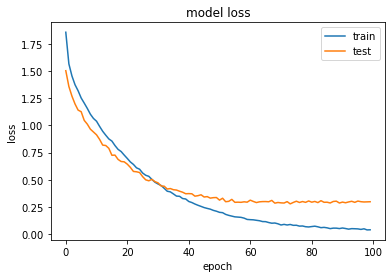

In [73]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

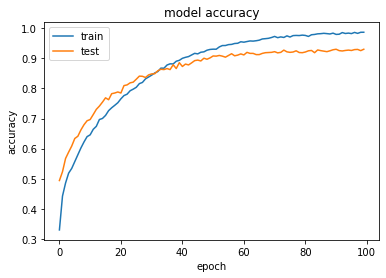

In [74]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [75]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.9301660060882568


In [76]:
X_test[1]

array([-466.1843    ,    1.5388278 ,  -34.397358  ,   35.715332  ,
        -15.16693   ,  -18.850813  ,   -0.74158096,  -15.99989   ,
        -21.354332  ,    7.6506834 ,  -29.031452  ,  -19.142824  ,
         -2.6798913 ,   -8.466884  ,  -14.7660475 ,   -7.004778  ,
         -7.103754  ,    8.887754  ,   14.911873  ,   21.47102   ,
         21.336624  ,    0.91695195,  -18.795404  ,   -5.0017214 ,
         -0.7015264 ,    2.91399   ,   -6.710599  ,  -16.638536  ,
         -9.821647  ,   12.8619585 ,    0.6552981 ,  -23.953394  ,
        -15.200551  ,    9.21079   ,   10.419801  ,   -0.57916147,
         -1.2440345 ,   17.722294  ,   13.837573  ,   -5.164349  ],
      dtype=float32)

In [77]:
model.predict(X_test)

array([[1.2112326e-11, 1.5535909e-10, 4.7991444e-10, ..., 5.7473879e-09,
        7.8893123e-08, 9.2392995e-08],
       [4.3566845e-11, 2.7813658e-03, 1.8047570e-03, ..., 5.6745695e-05,
        9.4529269e-06, 2.1101486e-04],
       [2.5509977e-16, 2.7742274e-11, 1.3660820e-11, ..., 4.3035704e-09,
        5.7069251e-14, 2.5752038e-07],
       ...,
       [2.9978611e-10, 9.9998653e-01, 1.0836834e-08, ..., 2.3462936e-14,
        2.4288232e-12, 3.7554191e-06],
       [3.0713895e-04, 1.3383126e-06, 4.9341628e-01, ..., 5.7059342e-06,
        8.4606671e-07, 5.0567281e-01],
       [6.2317208e-06, 8.8730428e-07, 9.7929549e-01, ..., 1.6776835e-11,
        3.0794755e-08, 3.4128127e-06]], dtype=float32)

### Testing the model with new audio file  

In [78]:
import numpy as np
filename="28808-1-0-7.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(" 1 :",mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(" 2 :",mfccs_scaled_features)
print(" 3 :",mfccs_scaled_features.shape)
predicted_label=np.argmax(model.predict(mfccs_scaled_features), axis=-1)
print(" 4 :",np.array(predicted_label))
prediction_class = labelencoder.inverse_transform(predicted_label) 
prediction_class

 1 : [-151.88322      95.09373     -55.130463     13.204096    -18.168022
   24.895966      4.776352      2.7581308   -21.299887      5.8962636
  -10.85416      -3.548564     -7.079522     12.540092     11.515671
   27.119339     14.467704     13.009642      5.8215556     0.9449881
   -7.0984316   -16.727127    -18.500866      1.9002684     0.58052343
   -7.88829     -11.529331     11.370933     22.986235     -0.340139
  -27.522377    -12.871614     17.100065     17.2624        2.8255985
    2.0260968    -4.392735    -24.268118    -15.198542     19.769062  ]
 2 : [[-151.88322      95.09373     -55.130463     13.204096    -18.168022
    24.895966      4.776352      2.7581308   -21.299887      5.8962636
   -10.85416      -3.548564     -7.079522     12.540092     11.515671
    27.119339     14.467704     13.009642      5.8215556     0.9449881
    -7.0984316   -16.727127    -18.500866      1.9002684     0.58052343
    -7.88829     -11.529331     11.370933     22.986235     -0.340139
   -27

array(['car_horn'], dtype='<U16')